# Avocado 데이터셋
Kaggle 에서 가져옴.  
아보카도의 saleprice 예측

데이터 출처 : 
https://www.kaggle.com/neuromusic/avocado-prices

데이터 전처리 참고 : 
https://www.kaggle.com/yemregundogmus/avocado-prices-analysis-and-prediction

## 0. 자주 쓰는 모듈들

In [45]:
# 자주 쓰는 모듈들
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import seaborn as sns
%matplotlib inline
import datetime

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings(action='ignore')

## 1. 불러오기 및 데이터 시각화

In [46]:
df = pd.read_csv("avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [47]:
# 필요없는 column 삭제
df = df.drop('Unnamed: 0',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [48]:
names = ["date", "avprice", "totalvol", "small","large","xlarge","totalbags","smallbags","largebags","xlargebags","type","year","region"] #get new column names
df = df.rename(columns=dict(zip(df.columns, names))) #rename columns
df.head()

# 아보카도 사이즈표에 따라 column을 rename
# http://www.bobbywires.com/plu-1.php?S=V&L=A&V=AVOCADOS

,date,avprice,totalvol,small,large,xlarge,totalbags,smallbags,largebags,xlargebags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [49]:
# 결측치 확인
df.isnull().sum(axis=0)

date          0
avprice       0
totalvol      0
small         0
large         0
xlarge        0
totalbags     0
smallbags     0
largebags     0
xlargebags    0
type          0
year          0
region        0
dtype: int64

In [50]:
# date가 type이 datetime 이 아니기 때문에 바꿔줌.
# 위의 사이트 참고함.

dates = [datetime.datetime.strptime(ts,"%Y-%m-%d") for ts in df['date']]
dates.sort()
sorteddates = [datetime.datetime.strftime(ts,"%Y-%m-%d") for ts in dates]
df['date'] = pd.DataFrame({'date':sorteddates})
df['Year'],df['Month'],df['Day'] = df['date'].str.split('-').str
df.head(5)



,date,avprice,totalvol,small,large,xlarge,totalbags,smallbags,largebags,xlargebags,type,year,region,Year,Month,Day
0,2015-01-04,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015,01,04
1,2015-01-04,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015,01,04
2,2015-01-04,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015,01,04
3,2015-01-04,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015,01,04
4,2015-01-04,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015,01,04


In [51]:
# Year와 year 동일하기 때문에 year삭제
df = df.drop('year',axis=1)

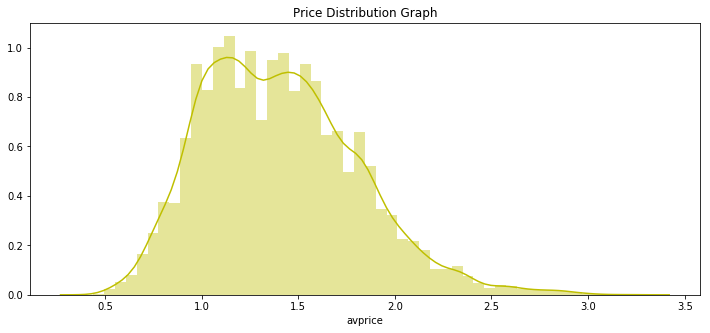

In [52]:
# avprice시각화
plt.figure(figsize=(12,5))
plt.title("Price Distribution Graph")
ax = sns.distplot(df["avprice"],color='y')

avprice의 분포는 오른쪽 꼬리가 있는 정규분포의 모습을 띄는 것을 알 수 있다.


Text(0.5,1,'Average Price by Year')

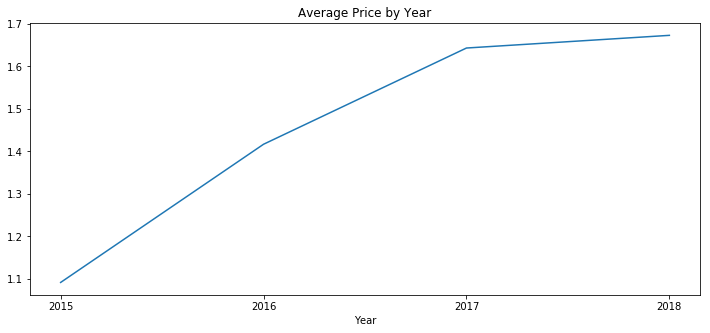

In [53]:
# 연별 avcprice 시각화
dategroup=df.groupby('Year').mean()
fig,ax = plt.subplots(figsize=(12,5))
ax.xaxis.set(ticks = range(0,13))
dategroup['avprice'].plot(x=df.Year)
plt.title('Average Price by Year')

Text(0.5,1,'Average Price by Month')

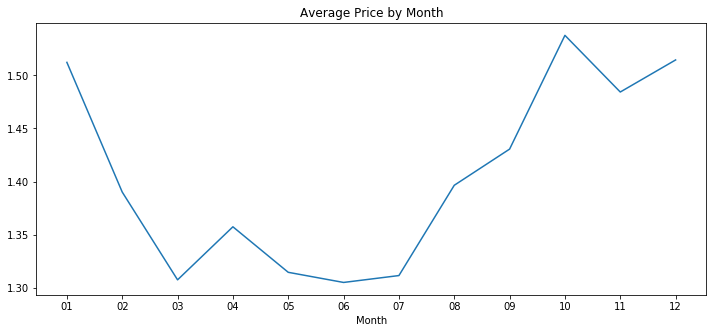

In [54]:
# 월별 avprice 시각화
dategroup=df.groupby('Month').mean()
fig, ax = plt.subplots(figsize=(12,5))
ax.xaxis.set(ticks=range(0,13)) # Manually set x-ticks
dategroup['avprice'].plot(x=df.Month)
plt.title('Average Price by Month')

Text(0.5,1,'Average Price by Day')

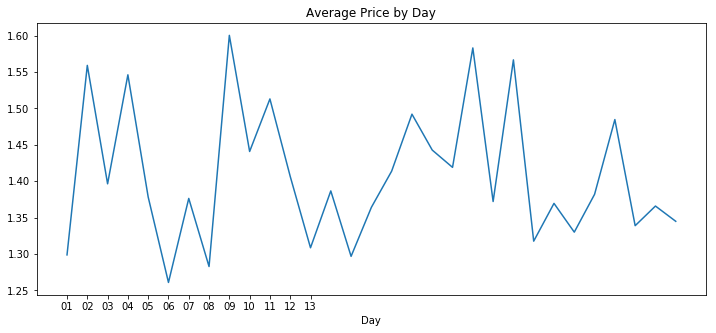

In [55]:
# 일별 avprice 시각화
dategroup=df.groupby('Day').mean()
fig, ax = plt.subplots(figsize=(12,5))
ax.xaxis.set(ticks=range(0,13)) # Manually set x-ticks
dategroup['avprice'].plot(x=df.Day)
plt.title('Average Price by Day')

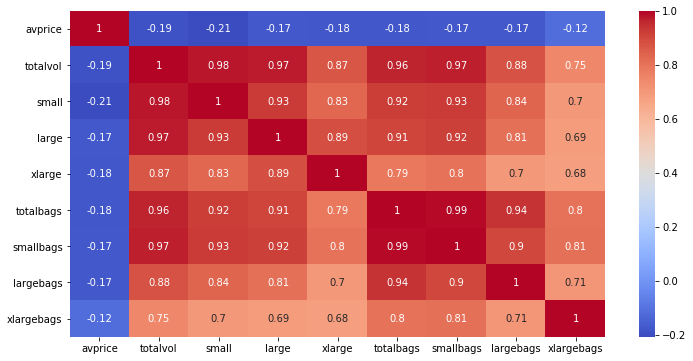

In [56]:
# target과의 Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

### target인 avprice와 크게 상관관계를 보이는 변수는 찾을 수 없었다.  
### 반면 변수들끼리는 높은 상관관계를 보여서 다중공선성이 의심된다.

In [57]:
# type별 갯수
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [58]:
# region별 갯수
df['region'].value_counts()

Chicago                338
MiamiFtLauderdale      338
Albany                 338
West                   338
CincinnatiDayton       338
NorthernNewEngland     338
TotalUS                338
HarrisburgScranton     338
SouthCarolina          338
Syracuse               338
Sacramento             338
Louisville             338
Philadelphia           338
LosAngeles             338
PhoenixTucson          338
Orlando                338
Columbus               338
California             338
BaltimoreWashington    338
Jacksonville           338
StLouis                338
Southeast              338
HartfordSpringfield    338
Denver                 338
Boston                 338
SouthCentral           338
Charlotte              338
DallasFtWorth          338
Roanoke                338
Spokane                338
Pittsburgh             338
Portland               338
Plains                 338
Boise                  338
Tampa                  338
Indianapolis           338
GreatLakes             338
D

## 2. 데이터 전처리

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        18249 non-null  object 
 1   avprice     18249 non-null  float64
 2   totalvol    18249 non-null  float64
 3   small       18249 non-null  float64
 4   large       18249 non-null  float64
 5   xlarge      18249 non-null  float64
 6   totalbags   18249 non-null  float64
 7   smallbags   18249 non-null  float64
 8   largebags   18249 non-null  float64
 9   xlargebags  18249 non-null  float64
 10  type        18249 non-null  object 
 11  region      18249 non-null  object 
 12  Year        18249 non-null  object 
 13  Month       18249 non-null  object 
 14  Day         18249 non-null  object 
dtypes: float64(9), object(6)
memory usage: 2.1+ MB


In [60]:
# 머신러닝을 위해 데이터 중 object인 변수를 삭제하거나 원핫인코딩
# date -> 삭제
# type -> conventional =0, organic = 1로 변환
# region -> 원핫 인코딩 (지역이 갯수가 많아서 차원이 커지지만 아래에서 pca 할거임)
# Year,Month,Day -> str을 int로 바꿔줌.

In [61]:
df = df.drop('date',axis=1)
df.loc[df['type']=='conventional','type']=0
df.loc[df['type']=='organic','type']=1

In [62]:
# region 원핫인코딩
region_dummies = pd.get_dummies(df['region'])
df2 = df.drop('region',axis=1)
df3 = pd.concat([df2,region_dummies],axis=1)
df3

,avprice,totalvol,small,large,xlarge,totalbags,smallbags,largebags,xlargebags,type,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,...,0,0,0,0,0,0,0,0,0,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,...,0,0,0,0,0,0,0,0,0,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,...,0,0,0,0,0,0,0,0,0,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,...,0,0,0,0,0,0,0,0,0,1


In [63]:
# string이 없도록 모두 numeric 하게 바꿔줌.
df3['Year']=pd.to_numeric(df['Year'])
df3['Month']=pd.to_numeric(df['Month'])
df3['Day']=pd.to_numeric(df['Day'])
df3['type']=pd.to_numeric(df['type'])

In [64]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 67 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   avprice              18249 non-null  float64
 1   totalvol             18249 non-null  float64
 2   small                18249 non-null  float64
 3   large                18249 non-null  float64
 4   xlarge               18249 non-null  float64
 5   totalbags            18249 non-null  float64
 6   smallbags            18249 non-null  float64
 7   largebags            18249 non-null  float64
 8   xlargebags           18249 non-null  float64
 9   type                 18249 non-null  int64  
 10  Year                 18249 non-null  int64  
 11  Month                18249 non-null  int64  
 12  Day                  18249 non-null  int64  
 13  Albany               18249 non-null  uint8  
 14  Atlanta              18249 non-null  uint8  
 15  BaltimoreWashington  18249 non-null 

In [65]:
# target과 feature 나누기

y = df3['avprice']
X = df3.drop('avprice',axis=1)

In [66]:
# train, test 데이터 셋 나누기
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [67]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14599 entries, 16391 to 15795
Data columns (total 66 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   totalvol             14599 non-null  float64
 1   small                14599 non-null  float64
 2   large                14599 non-null  float64
 3   xlarge               14599 non-null  float64
 4   totalbags            14599 non-null  float64
 5   smallbags            14599 non-null  float64
 6   largebags            14599 non-null  float64
 7   xlargebags           14599 non-null  float64
 8   type                 14599 non-null  int64  
 9   Year                 14599 non-null  int64  
 10  Month                14599 non-null  int64  
 11  Day                  14599 non-null  int64  
 12  Albany               14599 non-null  uint8  
 13  Atlanta              14599 non-null  uint8  
 14  BaltimoreWashington  14599 non-null  uint8  
 15  Boise                14599 non-n

In [68]:
# 변수간의 다중공선성이 예측되기 때문에 PCA사용
# 스케일 후 pca적용

scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train)
X_test2 = scaler.transform(X_test)

In [69]:
# 적당한 pca 차원의 수 찾기
pca = PCA()
X_pca = pca.fit_transform(X_train2)
sum(pca.explained_variance_ratio_)
cumsum = np.cumsum(pca.explained_variance_ratio_) #분산의 설명량을 누적합
num_d = np.argmax(cumsum >= 0.70) + 1 # 분산의 설명량이 70%이상 되는 차원의 수
num_d

38

In [70]:
# 차원 38개로 축소
pca = PCA(n_components=38)
X_pca = pca.fit_transform(X_train2)
X_test2 = pca.transform(X_test2)

## 3. 모델 사용 및 선정

### 적당한 회귀 모델 사용해보기


In [71]:
# Liner Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
%time lr.fit(X_pca,y_train)
pred=lr.predict(X_test2)

Wall time: 34.9 ms


In [72]:
# 평가
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.2157579167975464
MSE: 0.07967659977240299
RMSE: 0.28227043729799794


시간도 아주 짧게 걸리고 MSE도 낮게 나왔다.

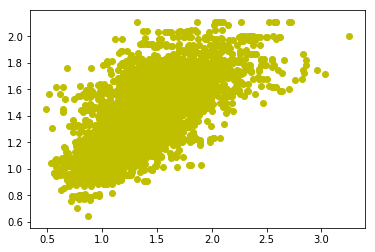

In [73]:
plt.scatter(x=y_test,y=pred,color='y')

In [74]:
# Decision Tree Regressor model 의사결정 회귀 모델
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
%time dtr.fit(X_pca,y_train)
pred = dtr.predict(X_test2)

# 평가
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Wall time: 1.37 s
MAE: 0.2474054794520548
MSE: 0.11875049315068494
RMSE: 0.34460193433973196


Text(0,0.5,'Predicted Y')

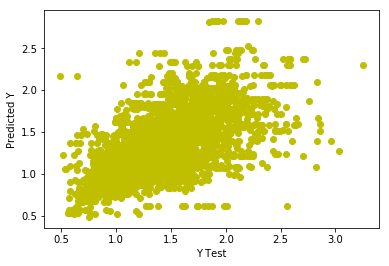

In [75]:
plt.scatter(x=y_test,y=pred,color='y')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

MSE값이 linear regression 모델 보다 커졌다. 0.08 -> 0.1  
시간도 더 오래걸림


In [76]:
# LGBM Regressor
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
%time lgbm.fit(X_pca,y_train)
pred = lgbm.predict(X_test2)

# 평가
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


Wall time: 910 ms
MAE: 0.1654268257003072
MSE: 0.05140853286451541
RMSE: 0.22673449862011605


Text(0,0.5,'Predicted Y')

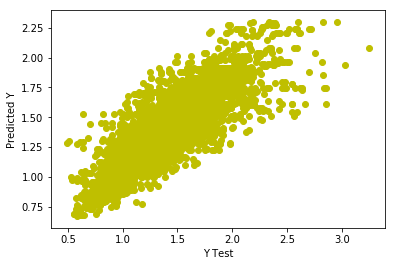

In [77]:
plt.scatter(x=y_test,y=pred,color='y')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### LGBM이 MSE 값도 0.05로 가장 작고 시간도 빠른 좋은 성능을 보였다.
### GridSearch로 하이퍼파라미터 튜닝을 한번만 해보자.

In [78]:
# lightGBM의 하이퍼파라미터를 그리드서치로 찾아보자

param_grid = {'boosting_type':['gbdt','dart','goss','rf'],'learning_rate':[0.05,0.1,0.15,0.2]}
grid = GridSearchCV(lgbm,param_grid,cv=3,return_train_score=True,scoring = 'max_error',verbose=3)
%time grid.fit(X_pca,y_train.ravel())

print("best parameters:{}".format(grid.best_params_))
print("best score:{}".format(grid.best_score_))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] boosting_type=gbdt, learning_rate=0.05 ..........................
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV]  boosting_type=gbdt, learning_rate=0.05, score=(train=-1.268, test=-1.171), total=   1.3s
[CV] boosting_type=gbdt, learning_rate=0.05 ..........................
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[CV]  boosting_type=gbdt, learning_rate=0.05, score=(train=-1.309, test=-1.287), total=   1.2s
[CV] boosting_type=gbdt, learning_rate=0.05 ..........................
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s
[CV]  boosting_type=gbdt, learning_rate=0.05, score=(train=-1.046, test=-1.388), total=   1.1s
[CV] boosting_type=gbdt, learning_rate=0.1 ...........................
[CV]  boosting_type=gbdt, learning_rate=0.1, score=(train=-1.135, test=-1.108), total=   1.4s
[CV] boosting_type=gbdt, learning_r

In [79]:
# 그리드 서치값으로 찾은 하이퍼파라미터 값 적용
lgbm2 = LGBMRegressor(boosting_type='gbdt', learning_rate = 0.2)
%time lgbm2.fit(X_pca,y_train)
pred = lgbm2.predict(X_test2)

# 평가
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Wall time: 1.13 s
MAE: 0.16435491223896487
MSE: 0.051452694468267
RMSE: 0.22683186387336987


## 성능이 미세하게 더 좋아졌음을 알 수있다.  
0.5 -> 0.49

## 4. 모델 저장해보기

In [80]:
# Pickle로 serialize해서 모델 저장하기 (나중에 다시 predict 할 수 있게)
import pickle
filename = 'avocado_lgbm_model.sav'
pickle.dump(lgbm2, open(filename,
                      'wb'))

# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
# https://scikit-learn.org/stable/tutorial/basic/tutorial.html

In [81]:
# 파일 불러와보기
# load the model from disk
loaded_model = pickle.load(open('avocado_lgbm_model.sav', 'rb'))
result = loaded_model.score(X_test2, y_test)
print(result)

0.679759830542332


## 5. Pipeline 사용해보기

In [82]:
from sklearn.pipeline import Pipeline
from joblib import Memory
from shutil import rmtree

In [83]:
df.head(5)

,avprice,totalvol,small,large,xlarge,totalbags,smallbags,largebags,xlargebags,type,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,Albany,2015,01,04
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,Albany,2015,01,04
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,Albany,2015,01,04
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,Albany,2015,01,04
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,Albany,2015,01,04


In [86]:
# 범주형 모두 전처리한 데이터 사용
y = df3['avprice']
X = df3.drop('avprice',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [87]:
# svr로 해보겠음.
from sklearn.svm import SVR

svr_pipe = Pipeline(steps=[
    ('sc', StandardScaler()), 
    ('svr',SVR()) 
])

In [89]:
# 하이퍼 파라미터 튜닝 없이
%time svr_pipe.fit(X_train, y_train) 
# 알아서 전처리 후에 svr 적용됨.

%time cross_val_score(svr_pipe, X_train, y_train, cv=5, scoring = 'r2').mean()

Wall time: 14.9 s
Wall time: 54.6 s


0.6714613342792518

데이터도 svr 과 cross_val_score를 쓰기에 많다고 생각했는데 생각보다 빨랐다.  
r2도 0.67로 나쁘지 않음.  
## 다음에 더 복잡한 pipeline적용해보기..숙제..

## 6. TPOT 적용해보기.

In [93]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=5,verbosity=2, config_dict='TPOT light')

%time tpot.fit(X_train,y_train)

Optimization Progress:  23%|██▎       | 139/600 [08:51<36:17,  4.72s/pipeline]

위에서 pipe line으로 svr모델 적용시 str이 포함된 범주형 자료가 있으면 안돌아갔는데, tpot은 돌아가는 것을 확인할 수 있었다.